In [364]:
import pandas as pd
import numpy as np

# Define files to be splitted
LANGECHANGE_AND_BRAKING__WITH_TIMESTAMPS = "data/brakeAndLaneChangesWithTimestamp.csv"
LANECHANGE_ONE_ROUND_WITH_TIMESTAMPS = "data/LCOneRoundWithTimestamp.csv"

# Create dataframes
LCandBrakingDF = pd.read_csv(LANGECHANGE_AND_BRAKING__WITH_TIMESTAMPS, sep=";", index_col=False)
LConeRoundDF = pd.read_csv(LANECHANGE_ONE_ROUND_WITH_TIMESTAMPS, sep=";", index_col=False)

# Split dataframe in 6 equal parts
df_split = np.array_split(LCandBrakingDF, 6)

### Notes regarding lane changes

From supervision meeting we expect around 8 lane changes in total.

Through our visual analysis of lat long:
- df_split[3] contains 1 clear lane change
- df_split[4] contains 3 clear lane changes
- df_split[5] contains 2 clear lane changes (and 1 potential)

To plot one section of the splitted dataframe
- df_split[0].plot(x = 'lon', y = 'lat')

### Algorithm for lane change detection (currently not working: detects noise from u-turns)

In [365]:
# Define the threshold value
threshold = 3.5

# Define which column "accel_trans" is in the dataframe
accel_trans_col = 4

# Define which loop we are going through
df = df_split[5]

arr = df.to_numpy()

i = 1
while i < len(arr):
    if arr[i, accel_trans_col] > threshold or arr[i, accel_trans_col] < -threshold:
        print(i)
        # Export 50 rows before and 150 rows after the current row
        start_index = max(0, i - 50)
        end_index = min(len(df), i + 150)
        output_df = df.iloc[start_index:end_index]

        # Visualization of output for testing
        # output_df.plot(x="ts", y=["accel_lon", "accel_trans"])
        # output_df.plot(x="lat", y="lon")

        # Do something with the output dataframe (e.g. save it as a CSV file)
        # output_df.to_csv(f"output_{i}.csv", sep=";", index=False)
        
        # Move to the next iteration, starting from the 100 rows after the current row
        i += 100 
    else:
        # Move to the next iteration, starting from the next row
        i += 1

1403


# Extract Lane changes

## Loop 4 (df_split3)

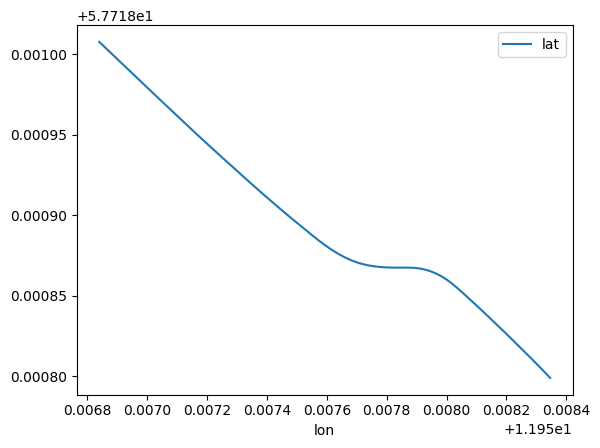

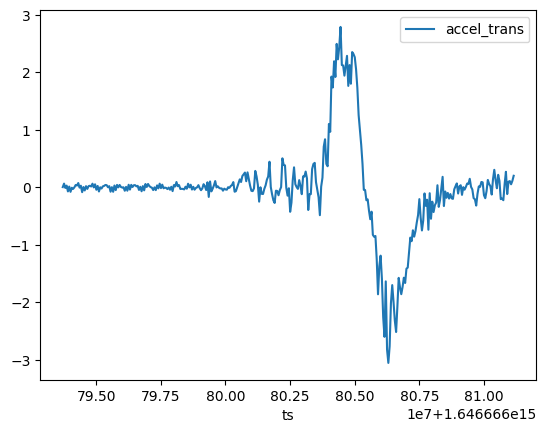

In [366]:
# df_split[3] contains 1 clear lane change

# First look
#output_df = df_split[3]

# Lane change
output_df = df_split[3].iloc[1250:1600]

# Plot result
output_df.plot(x = 'lon', y = 'lat')
output_df.plot(x = 'ts', y = 'accel_trans')

# Output to .csv
output_df.to_csv("data/lane_changes/lane_change_1.csv", sep=";", index=False)

## Loop 5 (df_split4)

In [346]:
df_split[4]

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
7255,57.719118,11.956593,0.062573,-0.321319,0.138476,0.426239,1646666821854536
7256,57.719118,11.956593,0.066136,0.249417,-0.079516,-0.389137,1646666821904556
7257,57.719118,11.956593,0.062958,-0.186125,-0.013865,0.159135,1646666821954575
7258,57.719118,11.956593,0.062068,0.052067,0.021396,-0.069093,1646666822004583
7259,57.719118,11.956593,0.061657,-0.038827,-0.080715,-0.049621,1646666822054564
...,...,...,...,...,...,...,...
9063,57.718715,11.958430,0.130887,0.067124,-0.012053,-0.080510,1646666912257600
9064,57.718715,11.958430,0.132009,-0.078466,0.019384,0.059751,1646666912307555
9065,57.718715,11.958430,0.132109,0.048066,-0.020621,-0.087233,1646666912357526
9066,57.718715,11.958430,0.133150,-0.094869,0.028378,0.073318,1646666912407547


<Axes: xlabel='lon'>

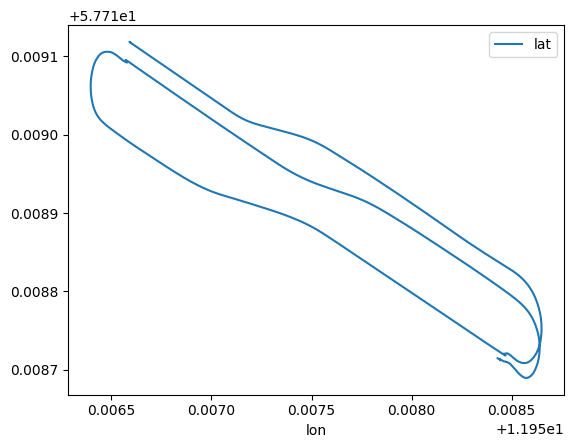

In [347]:
df_split[4].plot(x="lon", y="lat")

<Axes: xlabel='ts'>

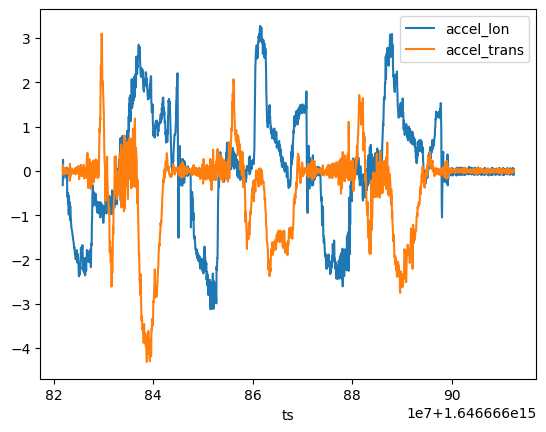

In [348]:
df_split[4].plot(x="ts", y=["accel_lon", "accel_trans"])

In [349]:
# View the minimum and maximum ts of loop 5 (df_split[4])
print(df_split[4]['ts'].min())
print(df_split[4]['ts'].max())

print(len(df_split[4]))

minIndex = 0
maxIndex = 1813

1646666821854536
1646666912457874
1813


### Lane change 1 (loop 5)

In [350]:
# Find the first lane change
output_df = df_split[4].iloc[0:300]
# Export the lane change
output_df.to_csv("data/lane_changes/lane_change_2.csv", sep=";", index=False)

<Axes: xlabel='lon'>

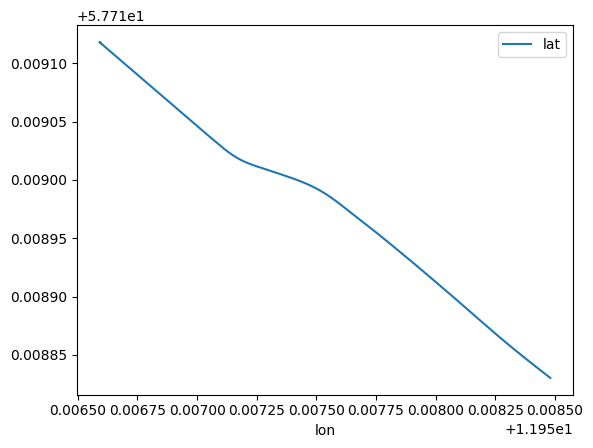

In [351]:
output_df.plot(x="lon", y="lat")

<Axes: xlabel='ts'>

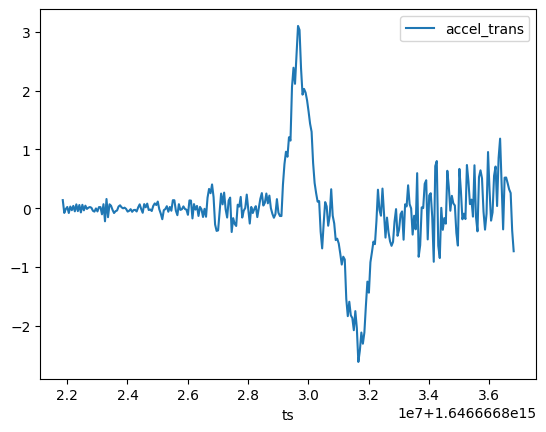

In [352]:
output_df.plot(x="ts", y=["accel_trans"])

### Lane change 2 (Loop 5)

In [353]:
# Find the first lane change
output_df = df_split[4].iloc[600:805]

# Export the first lane change
output_df.to_csv("data/lane_changes/lane_change_3.csv", sep=";", index=False)

<Axes: xlabel='lon'>

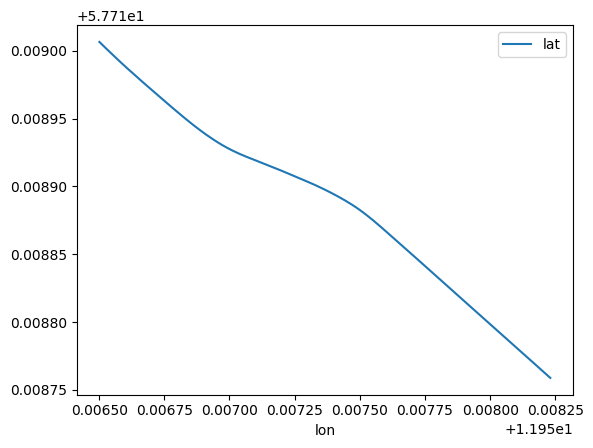

In [354]:
output_df.plot(x="lon", y="lat")

<Axes: xlabel='ts'>

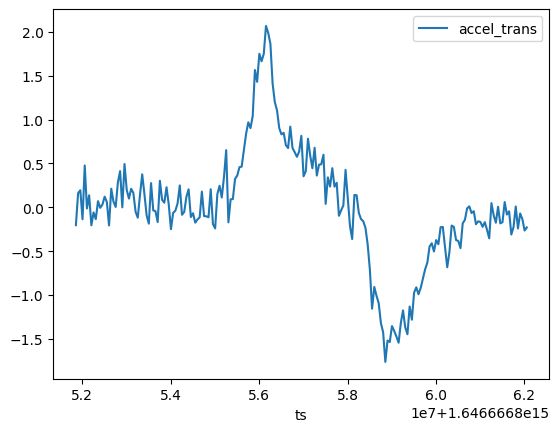

In [355]:
output_df.plot(x="ts", y=["accel_trans"])

### Lane change 3 (loop 5)

In [356]:
# Find the first lane change
output_df = df_split[4].iloc[1000:1320]

# Export the first lane change
output_df.to_csv("data/lane_changes/lane_change_4.csv", sep=";", index=False)

<Axes: xlabel='lon'>

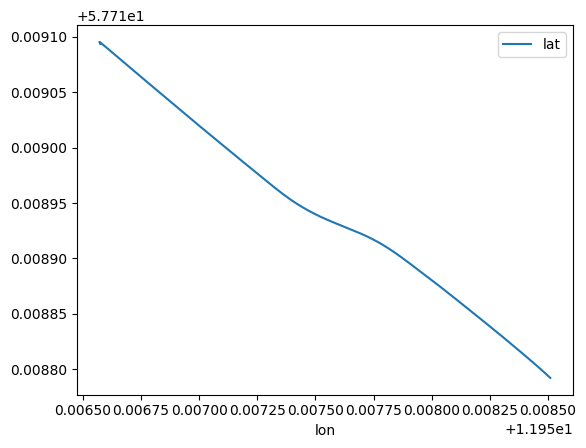

In [357]:
output_df.plot(x="lon", y="lat")

<Axes: xlabel='ts'>

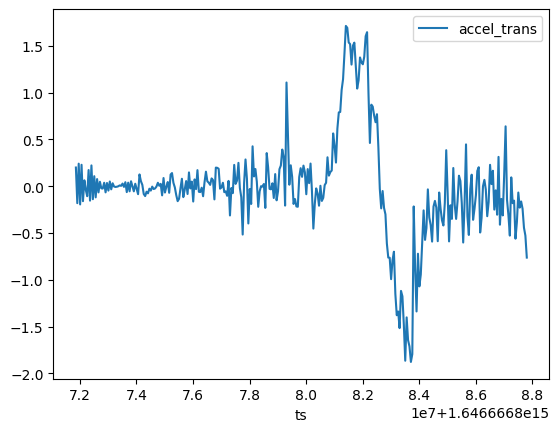

In [358]:
output_df.plot(x="ts", y=["accel_trans"])

## Loop 6 (df_split5)

<Axes: xlabel='ts'>

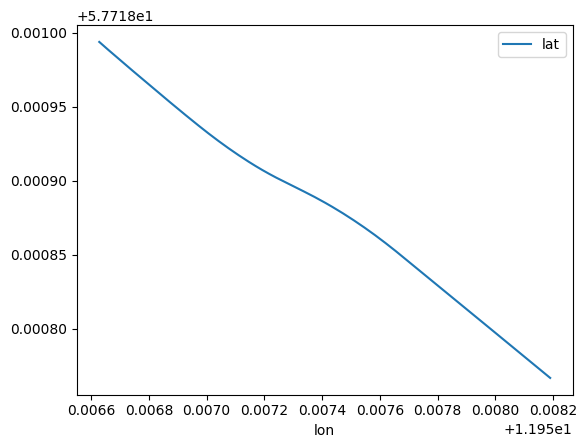

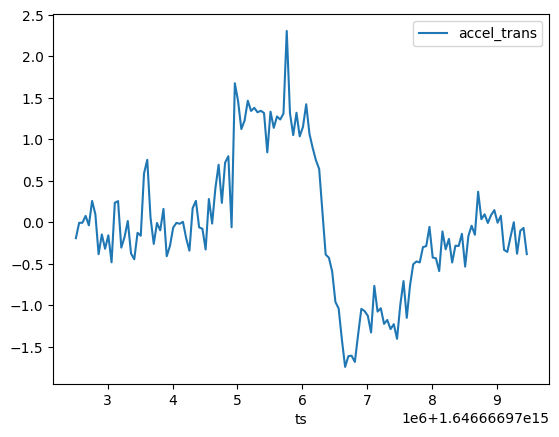

In [359]:
# df_split[5] contains 3 low intensity lane changes

# First look
#output_df = df_split[5]

# Lane change 2 (low intensity)
output_df = df_split[5].iloc[200:420]
# Output to .csv
output_df.to_csv("data/lane_changes/lane_change_5.csv", sep=";", index=False)

# Lane change 3 (very low intensity)
output_df = df_split[5].iloc[750:900]
# Output to .csv
output_df.to_csv("data/lane_changes/lane_change_6.csv", sep=";", index=False)

# Lane change 4 (extremely low intensity)
output_df = df_split[5].iloc[1200:1340]
# Output to .csv
output_df.to_csv("data/lane_changes/lane_change_7.csv", sep=";", index=False)

# Plot result
output_df.plot(x = 'lon', y = 'lat')
output_df.plot(x = 'ts', y = 'accel_trans')

## Loop 7 (Lanechange one round)

In [360]:
LConeRoundDF

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718584,11.958627,0.194917,1.242619,0.014429,-0.059848,1663765141811423
1,57.718584,11.958627,0.163694,1.228876,0.063122,0.026755,1663765141861423
2,57.718584,11.958627,0.163126,1.335767,0.117609,-0.135379,1663765141911406
3,57.718583,11.958627,0.180266,1.359777,0.060994,-0.048702,1663765141961382
4,57.718583,11.958627,0.222574,1.487516,0.034467,-0.162102,1663765142011418
...,...,...,...,...,...,...,...
1070,57.718596,11.958487,0.152977,-0.009616,0.032255,0.003031,1663765195311918
1071,57.718596,11.958487,0.150944,-0.025932,0.018902,-0.010924,1663765195362012
1072,57.718596,11.958487,0.150021,-0.035663,0.026482,0.024062,1663765195411908
1073,57.718596,11.958487,0.148947,-0.008712,0.021690,-0.004186,1663765195461957


<Axes: xlabel='lon'>

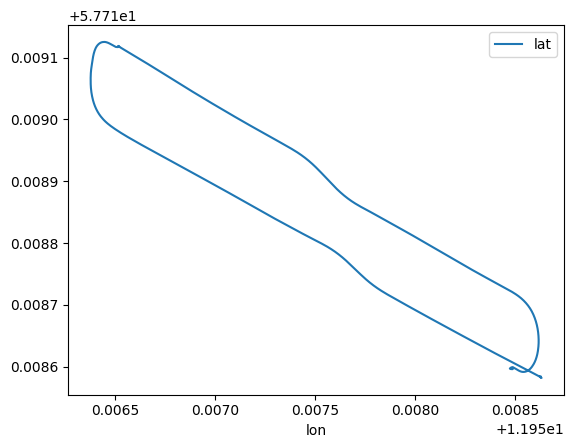

In [361]:
LConeRoundDF.plot(x="lon", y="lat")

<Axes: xlabel='ts'>

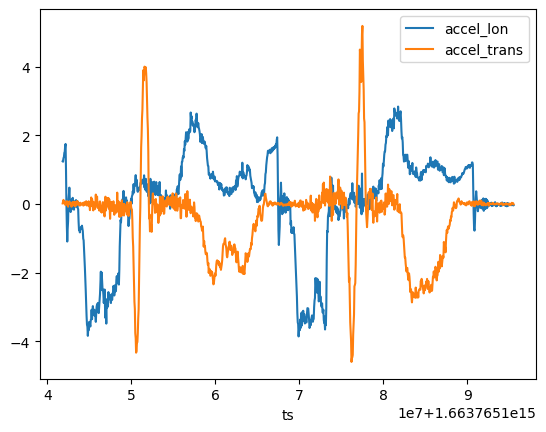

In [362]:
LConeRoundDF.plot(x="ts", y=["accel_lon", "accel_trans"])

In [363]:
# View the minimum and maximum ts of loop 7 (LConeRoundDF)
print(LConeRoundDF['ts'].min())
print(LConeRoundDF['ts'].max())

print(len(LConeRoundDF))

minIndex = 0
maxIndex = 1075

1663765141811423
1663765195511870
1075


### Lane change 1 (loop 7)

In [ ]:
# Find the first lane change
output_df = LConeRoundDF.iloc[0:300]
# Export the first lane change
output_df.to_csv("data/lane_changes/lane_change_8.csv", sep=";", index=False)

In [ ]:
output_df.plot(x="lon", y="lat")

In [ ]:
output_df.plot(x="ts", y=["accel_trans"])

### Lane change 2 (loop 7)

In [ ]:
# Find the first lane change
output_df = LConeRoundDF.iloc[600:750]
# Export the first lane change
output_df.to_csv("data/lane_changes/lane_change_9.csv", sep=";", index=False)

In [ ]:
output_df.plot(x="lon", y="lat")

In [ ]:
output_df.plot(x="ts", y=["accel_trans"])